In [1]:
import pandas as pd

csv_path = r"C:\Users\nawal\Downloads\debrisSolver_cdm_dataset (1)\2024_S1_cdm_ccsds.csv"


df = pd.read_csv(csv_path)

df.head()


,conjunction_id,ccsds_cdm_vers,comment_header,creation_date,originator,classification,message_for,message_id,event_id,comment_relative_metadata_data,...,object2_ctdot_t,object2_ctdot_n,object2_ctdot_rdot,object2_ctdot_tdot,object2_cndot_r,object2_cndot_t,object2_cndot_n,object2_cndot_rdot,object2_cndot_tdot,object2_cndot_ndot
0,4708712,1.0,COMMENT,2023-12-30 23:45:37.201629,SMS,NaN,NaN,sms9_4708712,3059662,COMMENT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4796676,1.0,COMMENT,2023-12-31 17:07:38.953699,SMS,NaN,NaN,sms9_4796676,3108026,COMMENT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4714477,1.0,COMMENT,2023-12-30 21:25:33.977263,SMS,NaN,NaN,sms9_4714477,3062731,COMMENT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4411173,1.0,COMMENT,2023-12-28 07:09:39.816940,SMS,NaN,NaN,sms9_4411173,2896647,COMMENT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4654350,1.0,COMMENT,2023-12-30 12:52:44.482941,SMS,NaN,NaN,sms9_4654350,3030325,COMMENT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df.columns

Index(['conjunction_id', 'ccsds_cdm_vers', 'comment_header', 'creation_date',
       'originator', 'classification', 'message_for', 'message_id', 'event_id',
       'comment_relative_metadata_data',
       ...
       'object2_ctdot_t', 'object2_ctdot_n', 'object2_ctdot_rdot',
       'object2_ctdot_tdot', 'object2_cndot_r', 'object2_cndot_t',
       'object2_cndot_n', 'object2_cndot_rdot', 'object2_cndot_tdot',
       'object2_cndot_ndot'],
      dtype='object', length=160)

In [3]:

candidate_cols = [
    'conjunction_id',
    'creation_date',
    'miss_distance',
    'relative_speed',
    'tca'  
]


important_cols = [c for c in candidate_cols if c in df.columns]
print("Columns we will actually use:", important_cols)

df_small = df[important_cols].copy()
df_small.head()


Columns we will actually use: ['conjunction_id', 'creation_date', 'miss_distance', 'relative_speed', 'tca']


,conjunction_id,creation_date,miss_distance,relative_speed,tca
0,4708712,2023-12-30 23:45:37.201629,360.998008,4152.541202,2024-01-01 00:02:05.515000
1,4796676,2023-12-31 17:07:38.953699,230.331161,6774.705183,2024-01-01 00:02:42.456000
2,4714477,2023-12-30 21:25:33.977263,203.939751,8049.963408,2024-01-01 00:03:50.751000
3,4411173,2023-12-28 07:09:39.816940,391.652906,9631.056058,2024-01-01 00:06:15.343000
4,4654350,2023-12-30 12:52:44.482941,394.310174,1069.289496,2024-01-01 00:06:16.278000


In [4]:
print("Columns containing 'miss':", [c for c in df.columns if 'miss' in c.lower()])
print("Columns containing 'tca':",  [c for c in df.columns if 'tca'  in c.lower()])
print("Columns containing 'vel':",  [c for c in df.columns if 'vel'  in c.lower()])
print("Columns containing 'object1':", [c for c in df.columns if 'object1' in c.lower()])
print("Columns containing 'object2':", [c for c in df.columns if 'object2' in c.lower()])


Columns containing 'miss': ['miss_distance']
Columns containing 'tca': ['tca']
Columns containing 'vel': ['relative_velocity_r', 'relative_velocity_t', 'relative_velocity_n']
Columns containing 'object1': ['comment_object1_metadata', 'object1_object_designator', 'object1_catalog_name', 'object1_object_name', 'object1_international_designator', 'object1_object_type', 'object1_operator_organization', 'object1_ephemeris_name', 'object1_covariance_method', 'object1_maneuverable', 'object1_orbit_center', 'object1_ref_frame', 'object1_cov_type', 'object1_cov_ref_frame', 'object1_gravity_model', 'object1_atmospheric_model', 'object1_n_body_perturbations', 'object1_solar_rad_pressure', 'object1_earth_tides', 'comment_object1_od_parameters', 'object1_time_lastob_start', 'object1_time_lastob_end', 'object1_recommended_od_span', 'object1_actual_od_span', 'object1_obs_available', 'object1_obs_used', 'object1_tracks_available', 'object1_tracks_used', 'object1_residuals_accepted', 'object1_weighted_

In [5]:

df_small['creation_date'] = pd.to_datetime(df_small['creation_date'], errors='coerce')
df_small['tca'] = pd.to_datetime(df_small['tca'], errors='coerce')


df_small['warning_time_hours'] = (df_small['tca'] - df_small['creation_date']).dt.total_seconds() / 3600

df_small[['creation_date', 'tca', 'warning_time_hours']].head()

,creation_date,tca,warning_time_hours
0,2023-12-30 23:45:37.201629,2024-01-01 00:02:05.515,24.274531
1,2023-12-31 17:07:38.953699,2024-01-01 00:02:42.456,6.917640
2,2023-12-30 21:25:33.977263,2024-01-01 00:03:50.751,26.637993
3,2023-12-28 07:09:39.816940,2024-01-01 00:06:15.343,88.943202
4,2023-12-30 12:52:44.482941,2024-01-01 00:06:16.278,35.225499


In [6]:

df_small[['miss_distance', 'relative_speed', 'warning_time_hours']].describe()


,miss_distance,relative_speed,warning_time_hours
count,185511.000000,185511.000000,185358.000000
mean,315.595593,7414.595895,45.746582
std,121.299285,4512.002830,32.823966
min,1.582203,0.002862,-42.827271
25%,224.220467,4644.384904,21.948911
50%,329.618681,6961.857788,50.888747
75%,419.414860,10473.114520,72.955969
max,499.999072,16859.543888,110.742979


<Axes: title={'center': 'Warning time (hours)'}, ylabel='Frequency'>

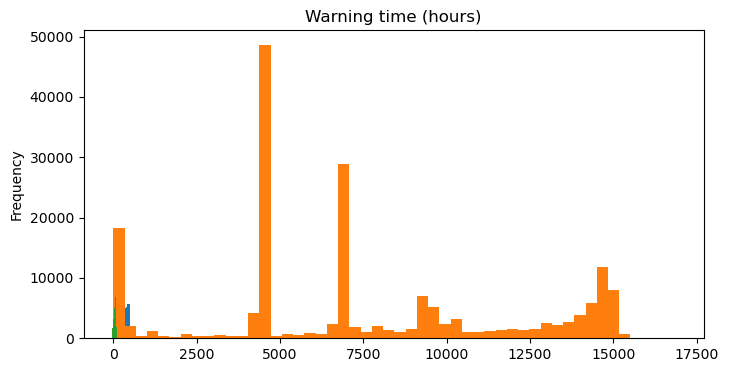

In [7]:
# Miss distance histogram
df_small['miss_distance'].plot.hist(bins=50, figsize=(8,4), title='Miss distance distribution')

# Relative speed histogram
df_small['relative_speed'].plot.hist(bins=50, figsize=(8,4), title='Relative speed distribution')

# Warning time histogram
df_small['warning_time_hours'].plot.hist(bins=50, figsize=(8,4), title='Warning time (hours)')


In [ ]:
def classify_risk(row):
    d = row['miss_distance']
    v = row['relative_speed']
    
    # Example thresholds in meters & km/s (you can tune later)
    if d > 3000:
        return "Low"
    elif d > 1000:
        return "Medium"
    elif d > 300:
        return "High"
    else:
        return "Critical"

df_small['risk_level'] = df_small.apply(classify_risk, axis=1)

df_small['risk_level'].value_counts()


In [ ]:
critical_events = df_small[df_small['risk_level'] == 'Critical']
high_events = df_small[df_small['risk_level'] == 'High']

len_critical = len(critical_events)
len_high = len(high_events)

len_critical, len_high


In [ ]:
critical_events['miss_distance'].plot.hist(
    bins=50, 
    figsize=(8,4), 
    title='Miss Distance Distribution (Critical Events)'
)

In [ ]:
high_events['miss_distance'].plot.hist(
    bins=50, 
    figsize=(8,4), 
    title='Miss Distance Distribution (High-Risk Events)'
)

In [ ]:
critical_events['warning_time_hours'].plot.hist(
    bins=50, 
    figsize=(8,4), 
    title='Warning Time (Hours) – Critical Events'
)

In [ ]:
critical_events['relative_speed'].plot.hist(
    bins=50,
    figsize=(8,4),
    title='Relative Speed Distribution – Critical Events'
)

In [ ]:
# Count high-risk and critical events

critical_events = df_small[df_small['risk_level'] == 'Critical']
high_events = df_small[df_small['risk_level'] == 'High']

print("Number of CRITICAL events:", len(critical_events))
print("Number of HIGH-RISK events:", len(high_events))


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df_small['miss_distance'], bins=80, color='orange', edgecolor='black')
plt.title("Miss Distance Distribution")
plt.xlabel("Miss Distance (meters)")
plt.ylabel("Number of Conjunctions")
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df_small['miss_distance'], df_small['relative_speed'], s=1, alpha=0.3)
plt.title("Relative Speed vs Miss Distance")
plt.xlabel("Miss Distance (meters)")
plt.ylabel("Relative Speed (m/s)")
plt.grid(True)
plt.show()


In [ ]:
[col for col in df_small.columns if "type" in col.lower()]

In [ ]:
import pandas as pd


In [ ]:
csv_path = r"C:\Users\nawal\Downloads\debrisSolver_cdm_dataset (1)\2024_S1_cdm_ccsds.csv"
df = pd.read_csv(csv_path)

candidate_cols = [
    'conjunction_id',
    'creation_date',
    'miss_distance',
    'relative_speed',
    'tca'
]

important_cols = [c for c in candidate_cols if c in df.columns]
df_small = df[important_cols].copy()


In [ ]:
df_small['tca'] = pd.to_datetime(df_small['tca'], errors='coerce')
df_small['creation_date'] = pd.to_datetime(df_small['creation_date'], errors='coerce')


In [ ]:
# Group by day of TCA
daily_counts = df_small.groupby(df_small['tca'].dt.date).size()

plt.figure(figsize=(12,5))
daily_counts.plot()
plt.title("Daily Conjunction Count")
plt.xlabel("Date")
plt.ylabel("Number of Conjunctions")
plt.grid(True)
plt.show()


In [ ]:


import pandas as pd
import matplotlib.pyplot as plt


csv_path = r"C:\Users\nawal\Downloads\debrisSolver_cdm_dataset (1)\2024_S1_cdm_ccsds.csv"
df = pd.read_csv(csv_path)


candidate_cols = [
    'conjunction_id',
    'creation_date',
    'miss_distance',
    'relative_speed',
    'tca'
]

important_cols = [c for c in candidate_cols if c in df.columns]
df_small = df[important_cols].copy()


df_small['creation_date'] = pd.to_datetime(df_small['creation_date'], errors='coerce')
df_small['tca'] = pd.to_datetime(df_small['tca'], errors='coerce')


df_small['warning_time_hours'] = (df_small['tca'] - df_small['creation_date']).dt.total_seconds() / 3600


def classify_risk(row):
    d = row['miss_distance']
    v = row['relative_speed']

    if pd.isna(d) or pd.isna(v):
        return "Unknown"
    if d > 3000:
        return "Low"
    elif d > 1000:
        return "Medium"
    elif d > 300:
        return "High"
    else:
        return "Critical"

df_small['risk_level'] = df_small.apply(classify_risk, axis=1)

print("✅ CDM setup complete.")
print("Rows:", len(df_small))
print("Columns:", list(df_small.columns))
print(df_small.head())


In [ ]:
daily_counts = df_small.groupby(df_small['tca'].dt.date).size()

plt.figure(figsize=(12,5))
daily_counts.plot()
plt.title("Daily Conjunction Count")
plt.xlabel("Date")
plt.ylabel("Number of Conjunctions")
plt.grid(True)
plt.show()


In [ ]:
monthly_counts = df_small.groupby(df_small['tca'].dt.to_period("M")).size()

plt.figure(figsize=(12,5))
monthly_counts.plot(kind='bar')
plt.title("Monthly Conjunction Count")
plt.xlabel("Month")
plt.ylabel("Number of Events")
plt.grid(True)
plt.show()


In [ ]:
critical_events = df_small[df_small['risk_level'] == "Critical"]
critical_daily = critical_events.groupby(critical_events['tca'].dt.date).size()

plt.figure(figsize=(12,5))
critical_daily.plot()
plt.title("Daily Critical Conjunctions")
plt.xlabel("Date")
plt.ylabel("Critical Events")
plt.grid(True)
plt.show()


In [ ]:

def classify_risk(row):
    d = row['miss_distance']
    v = row['relative_speed']
    
    if d > 3000:
        return "Low"
    elif d > 1000:
        return "Medium"
    elif d > 300:
        return "High"
    else:
        return "Critical"

df_small['risk_level'] = df_small.apply(classify_risk, axis=1)


In [ ]:
# 4.4 Daily Critical Conjunctions
critical_events = df_small[df_small['risk_level'] == "Critical"]

critical_daily = critical_events.groupby(critical_events['tca'].dt.date).size()

plt.figure(figsize=(12,5))
critical_daily.plot()
plt.title("Daily Critical Conjunctions")
plt.xlabel("Date")
plt.ylabel("Number of Critical Events")
plt.grid(True)
plt.show()


In [ ]:
# 4.5 Weekly pattern of conjunctions
weekly_counts = df_small.groupby(df_small['tca'].dt.to_period("W")).size()

plt.figure(figsize=(12,5))
weekly_counts.plot()
plt.title("Weekly Conjunction Count")
plt.xlabel("Week")
plt.ylabel("Number of Conjunctions")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np


df_small['hour'] = df_small['tca'].dt.hour

# Count events per hour per risk level
pivot = df_small.pivot_table(
    index='hour',
    columns='risk_level',
    values='conjunction_id',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(8,5))
plt.imshow(pivot.T, aspect='auto')
plt.colorbar(label='Number of Events')
plt.yticks(range(len(pivot.columns)), pivot.columns)
plt.xticks(range(0,24))
plt.xlabel("Hour of Day (UTC)")
plt.ylabel("Risk Level")
plt.title("Event Count by Hour and Risk Level")
plt.tight_layout()
plt.show()


In [ ]:

def maneuver_needed(row):
    if row['miss_distance'] < 100 and row['warning_time_hours'] < 24:
        return "Maneuver Required"
    else:
        return "No Maneuver"

df_small['maneuver_flag'] = df_small.apply(maneuver_needed, axis=1)


df_small['maneuver_flag'].value_counts()


In [ ]:
maneuver_daily = df_small[df_small['maneuver_flag'] == "Maneuver Required"] \
                    .groupby(df_small['tca'].dt.date).size()

plt.figure(figsize=(12,5))
maneuver_daily.plot()
plt.title("Daily Maneuvers Required (Based on CDM Data)")
plt.xlabel("Date")
plt.ylabel("Number of Required Maneuvers")
plt.grid(True)
plt.show()


In [ ]:
pd.crosstab(df_small['risk_level'], df_small['maneuver_flag'])


In [ ]:
plt.figure(figsize=(8,5))
df_small[df_small['maneuver_flag']=="Maneuver Required"]['miss_distance'].hist(
    bins=50, color='red', edgecolor='black')
plt.title("Miss Distance Distribution for Maneuver-Required Events")
plt.xlabel("Miss Distance (m)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [ ]:
def assign_maneuver(row):
    d = row['miss_distance']
    v = row['relative_speed']


    if d > 500:
        return "None"
    
 
    if 200 < d <= 500:
        if v < 5000:
            return "Traditional Thruster"
        else:
            return "Laser / Ion Beam"
    
    
    if d <= 200:
        return "Hybrid Emergency Maneuver"
    
df_small['maneuver_type'] = df_small.apply(assign_maneuver, axis=1)
df_small[['miss_distance','relative_speed','maneuver_type']].head()


In [ ]:
maneuver_counts = df_small['maneuver_type'].value_counts()
maneuver_counts


In [ ]:
plt.figure(figsize=(10,5))
maneuver_counts.plot(kind='bar', color=['green','orange','red','purple'])
plt.title("Maneuver Type Distribution")
plt.xlabel("Maneuver Type")
plt.ylabel("Number of Conjunctions")
plt.grid(True)
plt.show()


In [ ]:
def assign_maneuver(row):
    d = row['miss_distance']
    v = row['relative_speed']

    
    if d > 200:
        return "Traditional Thruster"

   
    if 50 < d <= 200:
        return "Laser-Based Nudging"


    if d <= 50:
        return "Physical Capture / Removal"

df_small['maneuver_type'] = df_small.apply(assign_maneuver, axis=1)


In [ ]:
maneuver_counts = df_small['maneuver_type'].value_counts()

plt.figure(figsize=(12,5))
maneuver_counts.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.title("ASTRA-X Recommended Maneuver Distribution")
plt.xlabel("Maneuver Type")
plt.ylabel("Number of Conjunctions")
plt.grid(True)
plt.show()


In [ ]:
def assign_maneuver(row):
    d = row['miss_distance']
    v = row['relative_speed']

 
    if d < 50 or v > 10000:
        return "Physical Capture / Removal"

  
    if d < 200 or v > 5000:
        return "Laser-Based Nudging"

    
    return "Traditional Thruster"

df_small['maneuver_type'] = df_small.apply(assign_maneuver, axis=1)
df_small[['miss_distance','relative_speed','maneuver_type']].head()


In [ ]:
plt.figure(figsize=(10,5))
maneuver_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Maneuver Type Distribution")
plt.xlabel("Maneuver Type")
plt.ylabel("Number of Conjunctions")
plt.grid(True)
plt.show()


In [ ]:
maneuver_counts = df_small['maneuver_type'].value_counts()
maneuver_counts


In [ ]:
maneuver_counts = df_small['maneuver_type'].value_counts()
maneuver_counts


In [ ]:
plt.figure(figsize=(10,5))
maneuver_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Maneuver Type Distribution")
plt.xlabel("Maneuver Type")
plt.ylabel("Number of Conjunctions")
plt.grid(True)
plt.show()



In [ ]:

df_small['date'] = df_small['tca'].dt.date


daily_maneuvers = df_small.groupby(['date', 'maneuver_type']).size().unstack(fill_value=0)

plt.figure(figsize=(15,6))
daily_maneuvers.plot()
plt.title("Daily Count of Maneuver Types Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Maneuvers")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def power_cost(row):
    if row['maneuver_type'] == "Traditional Thruster":
        return 10
    elif row['maneuver_type'] == "Laser-Based Nudging":
        return 25
    elif row['maneuver_type'] == "Physical Capture / Removal":
        return 40

df_small['power_wh'] = df_small.apply(power_cost, axis=1)



In [ ]:
daily_power = df_small.groupby(df_small['date'])['power_wh'].sum()

plt.figure(figsize=(15,6))
daily_power.plot(color='purple')
plt.title("Total Daily Power Required for Conjunction Mitigation")
plt.xlabel("Date")
plt.ylabel("Energy (Wh)")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
power_by_type = df_small.groupby('maneuver_type')['power_wh'].sum()

plt.figure(figsize=(10,5))
power_by_type.plot(kind='bar', color=['blue','orange','red'])
plt.title("Total Energy Consumption by Maneuver Type")
plt.ylabel("Energy (Wh)")
plt.xlabel("Maneuver Type")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:


urgent = df_small[
    (df_small['warning_time_hours'] < 24) &
    (df_small['maneuver_type'] != "Traditional Thruster")
]

non_urgent = df_small[
    (df_small['warning_time_hours'] >= 24) |
    (df_small['maneuver_type'] == "Traditional Thruster")
]

len(urgent), len(non_urgent)


In [ ]:
plt.figure(figsize=(8,5))
urgent['warning_time_hours'].hist(bins=50)
plt.title("Warning Time Distribution for Time-Critical Events")
plt.xlabel("Warning Time (hours)")
plt.ylabel("Number of Conjunctions")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
urgent = urgent.copy()
urgent['decision_time_hours'] = urgent['warning_time_hours'] * 0.2
urgent[['warning_time_hours', 'decision_time_hours']].head()



In [ ]:

N_cpu_per_hour = 100      
speedup_factor = 10       

urgent = urgent.copy()
urgent['cpu_candidates'] = urgent['decision_time_hours'] * N_cpu_per_hour
urgent['neuro_candidates'] = urgent['decision_time_hours'] * N_cpu_per_hour * speedup_factor

urgent[['warning_time_hours', 'decision_time_hours', 'cpu_candidates', 'neuro_candidates']].head()



In [ ]:
urgent[['cpu_candidates', 'neuro_candidates']].describe()


In [ ]:
plt.figure(figsize=(8,5))
urgent['cpu_candidates'].hist(bins=50, alpha=0.7, label='Conventional CPU')
urgent['neuro_candidates'].hist(bins=50, alpha=0.7, label='Neuromorphic (10x)')
plt.title("Number of Candidate Maneuvers Evaluated Within Decision Window")
plt.xlabel("Number of Candidate Maneuvers")
plt.ylabel("Conjunction Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
digital_twin_df = pd.DataFrame({
    'maneuvers_total': df_small.groupby('date').size(),
    'power_total_wh': df_small.groupby('date')['power_wh'].sum()
})

digital_twin_df.head()


In [ ]:
digital_twin_df['maneuvers_forecast'] = digital_twin_df['maneuvers_total'].rolling(window=7).mean()
digital_twin_df['power_forecast'] = digital_twin_df['power_total_wh'].rolling(window=7).mean()


In [ ]:
plt.figure(figsize=(15,6))
plt.plot(digital_twin_df.index, digital_twin_df['maneuvers_total'], label='Actual')
plt.plot(digital_twin_df.index, digital_twin_df['maneuvers_forecast'], label='Forecast (7-day MA)', linewidth=3)
plt.title("Digital Twin – Maneuver Load Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Maneuvers")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df_small['relative_speed'].plot.hist(bins=50)
plt.xlabel("Relative Speed")
plt.ylabel("Frequency")
plt.title("Relative Velocity Distribution – All Conjunction Events")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from pathlib import Path


csv_path = Path(r"C:\Users\nawal\Downloads\debrisSolver_cdm_dataset (1)\2024_S1_cdm_ccsds.csv")


df = pd.read_csv(csv_path)


df_small = df.copy()

print("Loaded rows:", len(df), " | columns:", len(df.columns))
df.head()


In [ ]:
from pathlib import Path

downloads = Path(r"C:\Users\nawal\Downloads")
matches = list(downloads.rglob("*.csv"))


for p in matches:
    if "cdm" in p.name.lower() or "debris" in p.name.lower() or "ccsds" in p.name.lower():
        print(p)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df_small["creation_date"] = pd.to_datetime(df_small["creation_date"], errors="coerce")
df_small["tca"] = pd.to_datetime(df_small["tca"], errors="coerce")


df_small["warning_time_hours"] = (df_small["tca"] - df_small["creation_date"]).dt.total_seconds() / 3600


df_small = df_small.dropna(subset=["warning_time_hours"])
df_small = df_small[df_small["warning_time_hours"] >= 0]  


critical_df = df_small[df_small["risk_level"] == "Critical"] if "risk_level" in df_small.columns else None

plt.figure(figsize=(10,5))
plt.hist(df_small["warning_time_hours"], bins=60, alpha=0.7, label="All events")

if critical_df is not None and len(critical_df) > 0:
    plt.hist(critical_df["warning_time_hours"], bins=60, alpha=0.7, label="Critical events")

plt.title("Warning Time Distribution (Hours)")
plt.xlabel("Warning Time (hours)")
plt.ylabel("Frequency")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig("Figure6_warning_time_distribution.png", dpi=300)
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


candidate_cols = [c for c in df_small.columns if "relative" in c.lower() and "speed" in c.lower()]
if not candidate_cols:
    candidate_cols = [c for c in df_small.columns if ("rel" in c.lower()) and ("speed" in c.lower())]

print("Candidate relative speed columns:", candidate_cols)


rel_col = candidate_cols[0] 
print("Using column:", rel_col)


rel_speed = pd.to_numeric(df_small[rel_col], errors="coerce").dropna()


plt.figure(figsize=(9, 4.8))
plt.hist(rel_speed, bins=60, edgecolor="black")
plt.title("Relative Velocity Distribution – All Conjunction Events")
plt.xlabel("Relative Velocity (m/s)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.tight_layout()


plt.savefig("Figure6_relative_velocity_all_events.png", dpi=300)
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_small["creation_date"] = pd.to_datetime(df_small["creation_date"], errors="coerce")
df_small["tca"] = pd.to_datetime(df_small["tca"], errors="coerce")


df_small["warning_time_hours"] = (df_small["tca"] - df_small["creation_date"]).dt.total_seconds() / 3600


df_small["miss_distance"] = pd.to_numeric(df_small["miss_distance"], errors="coerce")
df_small["relative_speed"] = pd.to_numeric(df_small["relative_speed"], errors="coerce")


df_small = df_small.dropna(subset=["warning_time_hours", "miss_distance", "relative_speed"])
df_small = df_small[df_small["warning_time_hours"] >= 0]


if "risk_level" not in df_small.columns:
   
    df_small["risk_level"] = np.where(df_small["miss_distance"] < 200, "Critical", "Non-Critical")

df_small[["warning_time_hours","miss_distance","relative_speed","risk_level"]].head()



In [ ]:
# ====== ASSUMPTION PARAMETERS (EDIT THESE IF NEEDED) ======
T_AVOID_HR     = 12   # conventional avoidance maneuver planning+execution
T_EMERGENCY_HR = 4    # emergency pre-planned rapid maneuver
T_LASER_HR     = 1    # rapid non-contact intervention (conceptual)
# Active removal is long-term (not hours); we won't compare it on the same time axis.


In [ ]:
wt = df_small["warning_time_hours"]

plt.figure(figsize=(9,5))


y = np.random.uniform(0.9, 1.1, size=len(wt))
plt.scatter(wt, y, s=2, alpha=0.25)


plt.axvline(T_LASER_HR, linestyle="--", linewidth=2, label=f"Laser threshold = {T_LASER_HR} hr")
plt.axvline(T_EMERGENCY_HR, linestyle="--", linewidth=2, label=f"Emergency threshold = {T_EMERGENCY_HR} hr")
plt.axvline(T_AVOID_HR, linestyle="--", linewidth=2, label=f"Avoidance threshold = {T_AVOID_HR} hr")

plt.title("Figure 8 — Available Warning Time vs Response Feasibility Thresholds")
plt.xlabel("Warning Time (hours)")
plt.yticks([])  # y-axis not meaningful here
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

plt.savefig("Figure8_warning_time_thresholds.png", dpi=300)
plt.show()


In [ ]:

MARGIN = 0.20

df_small["avoid_feasibility"] = np.select(
    [
        df_small["warning_time_hours"] >= T_AVOID_HR * (1 + MARGIN),
        (df_small["warning_time_hours"] >= T_AVOID_HR * (1 - MARGIN)) & (df_small["warning_time_hours"] < T_AVOID_HR * (1 + MARGIN)),
        df_small["warning_time_hours"] < T_AVOID_HR * (1 - MARGIN),
    ],
    ["Feasible", "Marginal", "Infeasible"],
    default="Infeasible"
)

counts = df_small["avoid_feasibility"].value_counts().reindex(["Feasible","Marginal","Infeasible"])

plt.figure(figsize=(7,4.8))
plt.bar(counts.index, counts.values)
plt.title("Figure 9 — Conventional Avoidance Feasibility (Based on Warning Time)")
plt.xlabel("Feasibility Class")
plt.ylabel("Number of Events")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()


counts


In [ ]:
def assign_strategy(row):
    wt = row["warning_time_hours"]
    critical = (row["risk_level"] == "Critical")

    # Time-driven selection (editable)
    if wt >= T_AVOID_HR and not critical:
        return "Traditional Avoidance"
    if wt >= T_AVOID_HR and critical:
        return "Traditional Avoidance (High Priority)"
    if wt >= T_EMERGENCY_HR and critical:
        return "Emergency Maneuver"
    if wt >= T_LASER_HR and critical:
        return "Laser Nudging (Non-contact)"
    if wt < T_LASER_HR and critical:
        return "Active Removal Candidate (Net/Inflatable)"
    return "Monitor / No Action"

df_small["recommended_strategy"] = df_small.apply(assign_strategy, axis=1)


strategy_counts = df_small["recommended_strategy"].value_counts()

plt.figure(figsize=(9,5))
plt.bar(strategy_counts.index, strategy_counts.values)
plt.title("Figure 10 — Strategy Mapping Based on Time Constraints and Risk Level")
plt.xlabel("Recommended Response Strategy")
plt.ylabel("Number of Events")
plt.xticks(rotation=25, ha="right")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()



strategy_counts


In [ ]:
df_small.columns

In [ ]:
df_small = df_small.rename(columns={
    'warning_time': 'warning_time_hours'
})


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = df_small[
    (df_small['warning_time_hours'] > 0) &
    (df_small['power_wh'] > 0)
].copy()

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=plot_df,
    x='warning_time_hours',
    y='power_wh',
    hue='maneuver_type',
    alpha=0.4
)

plt.axvline(24, color='red', linestyle='--', label='24h Decision Limit')
plt.xlabel('Available Warning Time (hours)')
plt.ylabel('Energy Required (Wh)')
plt.title('Time–Energy Feasibility Space for Conjunction Response')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df_small = df_small.rename(columns={
    'warning_time': 'warning_time_hours'
})


In [ ]:
df_small['warning_time_hours'] = (
    df_small['tca'] - df_small['cdm_creation_time']
).dt.total_seconds() / 3600


In [ ]:
print(df_small.columns.tolist())



In [ ]:
df_small.columns = df_small.columns.str.strip()
print(df_small.columns.tolist())


In [ ]:
cols = [c for c in df_small.columns if "warning" in c.lower() and "time" in c.lower()]
print("Possible warning-time columns:", cols)


In [ ]:
wt_col = cols[0]   # uses the first match
df_small["warning_time_hours"] = df_small[wt_col].astype(float)


In [ ]:
# if your column is in days:
df_small["warning_time_hours"] = df_small[wt_col].astype(float) * 24.0



In [ ]:
import matplotlib.pyplot as plt

plot_df = df_small.copy()
plot_df = plot_df.dropna(subset=["warning_time_hours"])

plt.figure(figsize=(9,4.5))
plt.hist(plot_df["warning_time_hours"], bins=60)
plt.xlabel("Available warning time (hours)")
plt.ylabel("Count")
plt.title("Figure 11 — Warning Time Distribution Used in Vts Verification")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print(df_small.columns.tolist())


In [ ]:

def assign_maneuver(row):
    if row["miss_distance"] < 50:
        return "Physical Capture / Removal"
    elif row["miss_distance"] < 200:
        return "Laser-Based Nudging"
    else:
        return "Traditional Thruster"

df_fig11 = df_small.copy()
df_fig11["maneuver_type"] = df_fig11.apply(assign_maneuver, axis=1)


In [ ]:
df_fig11["warning_time_hours"] = (
    df_fig11["tca"] - df_fig11["creation_date"]
).dt.total_seconds() / 3600

df_fig11 = df_fig11[df_fig11["warning_time_hours"] > 0]


In [ ]:
energy_map = {
    "Traditional Thruster": 10,
    "Laser-Based Nudging": 25,
    "Physical Capture / Removal": 40
}

df_fig11["energy_wh"] = df_fig11["maneuver_type"].map(energy_map)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

colors = {
    "Traditional Thruster": "blue",
    "Laser-Based Nudging": "orange",
    "Physical Capture / Removal": "red"
}

for mtype in df_fig11["maneuver_type"].unique():
    subset = df_fig11[df_fig11["maneuver_type"] == mtype]
    plt.scatter(
        subset["warning_time_hours"],
        subset["energy_wh"],
        alpha=0.35,
        s=8,
        label=mtype,
        color=colors[mtype]
    )

plt.xlabel("Available warning time (hours)")
plt.ylabel("Energy required (Wh)")
plt.title("Figure 11 – Maneuver Feasibility Under Joint Time and Energy Constraints")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("Figure11_TimeEnergy_Feasibility.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

colors = {
    "Traditional Thruster": "blue",
    "Laser-Based Nudging": "orange",
    "Physical Capture / Removal": "red"
}

for mtype in df_fig11["maneuver_type"].unique():
    subset = df_fig11[df_fig11["maneuver_type"] == mtype]
    plt.scatter(
        subset["warning_time_hours"],
        subset["energy_wh"],
        alpha=0.35,
        s=8,
        label=mtype,
        color=colors[mtype]
    )

plt.xlabel("Available warning time (hours)")
plt.ylabel("Energy required (Wh)")
plt.title("Figure 11 – Maneuver Feasibility Under Joint Time and Energy Constraints")
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()
